## Line Detection

<img align="right" src="img/road_segmentation.jpg" />
The result of image processing was a binary image, or mask, with the pixels that belong to the line, i.e. the cyan-colored pixels.

For driving the robot, we need to compute some value relating the position of the robot to the line in the ground. In this task, it is sufficient to keep the line centered in the image. For more complex tasks, there are algorithms that compute the geometrical parameters of the line image, and its 3D reconstruction in real space.

Our method is far simpler: we consider the line as a blob in the image, whose [*image moments*](http://aishack.in/tutorials/image-moments/) can be computed, particularly its [*centroid*](https://en.wikipedia.org/wiki/Image_moment#Central_moments). That information will be used for later driving the robot appropriately.

#### Image Acquisition

In [1]:
import packages.initialization
import pioneer3dx as p3dx
p3dx.init()

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import motion_widget

In [4]:
import tilt_widget

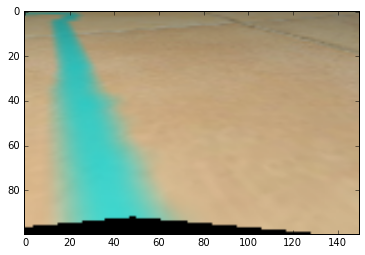

In [8]:
plt.imshow(p3dx.image);

#### Image Processing

In [6]:
import cv2
import numpy

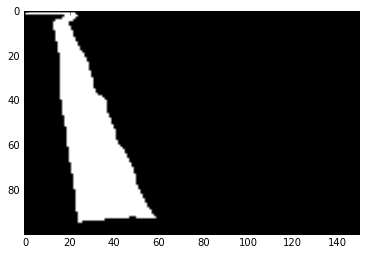

In [9]:
hsv = cv2.cvtColor(p3dx.image, cv2.COLOR_RGB2HSV)
lower_cyan = numpy.array([80, 100, 100])
upper_cyan = numpy.array([100, 255, 255])
mask = cv2.inRange(hsv, lower_cyan, upper_cyan)
plt.imshow(mask,cmap='gray');

#### Computing the Centroid

We use here some heuristics: first, the Kinect should tilt down for observing the line close to the robot, not far away; second, we will only consider the bottom part of the line for computing the image moments; doing so will prevent the robot to turn before it actually arrives to the curve. In practice, we will set all the pixels to black (zeros) for the lines between 0 and 80.

In [ ]:
mask[0:80, 0:150] = 0
plt.imshow(mask,cmap='gray');

Finally, we compute the moments, the [centroid](https://en.wikipedia.org/wiki/Image_moment#Central_moments), and display the original image, with a red circle at the position of the centroid of the computed blob. If the result is correct, the circle should be centered on the bottom of the cyan line.

In [ ]:
M = cv2.moments(mask)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
plt.imshow(p3dx.image)
axes = plt.gca()
axes.add_artist(plt.Circle((cx,cy),10,color='r'));

Next: [Line Following](Line%20Following.ipynb)

---
#### Try-a-Bot: an open source guide for robot programming
Developed by:
[![Robotic Intelligence Lab @ UJI](img/logo/robinlab.png "Robotic Intelligence Lab @ UJI")](http://robinlab.uji.es)

Sponsored by:
<table>
<tr>
<td style="border:1px solid #ffffff ;">
<a href="http://www.ieee-ras.org"><img src="img/logo/ras.png"></a>
</td>
<td style="border:1px solid #ffffff ;">
<a href="http://www.cyberbotics.com"><img src="img/logo/cyberbotics.png"></a>
</td>
<td style="border:1px solid #ffffff ;">
<a href="http://www.theconstructsim.com"><img src="img/logo/theconstruct.png"></a>
</td>
</tr>
</table>

Follow us:
<table>
<tr>
<td style="border:1px solid #ffffff ;">
<a href="https://www.facebook.com/RobotProgrammingNetwork"><img src="img/logo/facebook.png"></a>
</td>
<td style="border:1px solid #ffffff ;">
<a href="https://www.youtube.com/user/robotprogrammingnet"><img src="img/logo/youtube.png"></a>
</td>
</tr>
</table>